In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

In [2]:
data = pd.read_csv('data.csv', ',', error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
data.shape

(669640, 2)

In [4]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data['strength'].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

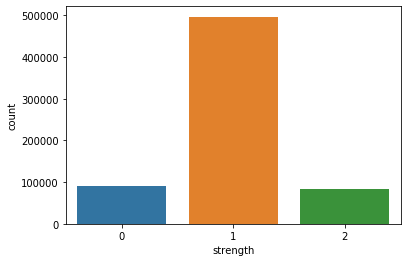

In [21]:
sns.countplot(x='strength', data=data)

In [8]:
pass_tuple = np.array(data)
random.shuffle(pass_tuple) #for robustness as array is created in order

In [9]:
X = [label[0] for label in pass_tuple]
y = [label[1] for label in pass_tuple]

In [10]:
# function to use chars instead of words 
def word_divide_char(inputs):
    characters = []
    for i in inputs:
        characters.append(i)
    return characters

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

#need to understand this function how it works 

In [12]:
X.shape

(669639, 128)

In [13]:
vectorizer.vocabulary_

{'k': 60,
 'z': 75,
 'd': 53,
 'e': 54,
 '5': 33,
 '7': 35,
 'i': 58,
 'n': 63,
 'o': 64,
 '3': 31,
 '4': 32,
 'v': 71,
 's': 68,
 '1': 29,
 'y': 74,
 'r': 67,
 'a': 50,
 'q': 66,
 'l': 61,
 'm': 62,
 'g': 56,
 'f': 55,
 't': 69,
 '2': 30,
 'u': 70,
 '6': 34,
 'c': 52,
 '8': 36,
 'h': 57,
 'w': 72,
 'b': 51,
 '9': 37,
 '0': 28,
 'j': 59,
 'p': 65,
 '@': 43,
 '-': 25,
 'x': 73,
 '.': 26,
 ';': 38,
 '!': 15,
 '_': 48,
 '>': 41,
 '&': 20,
 '?': 42,
 '<': 39,
 '±': 89,
 '(': 21,
 ')': 22,
 '"': 16,
 '~': 79,
 '+': 24,
 '^': 47,
 '/': 27,
 '$': 18,
 '%': 19,
 ' ': 14,
 '#': 17,
 '*': 23,
 '[': 44,
 ']': 46,
 'ô': 115,
 '{': 76,
 '}': 78,
 'þ': 124,
 'ó': 114,
 '=': 40,
 '`': 49,
 '\x1c': 11,
 '\\': 45,
 'ú': 120,
 '\x16': 7,
 'ò': 113,
 '·': 95,
 '\x1e': 13,
 '³': 91,
 '\x19': 9,
 'à': 102,
 'ä': 106,
 'å': 107,
 '‚': 126,
 '\x7f': 80,
 '«': 87,
 '¿': 100,
 '\x05': 0,
 '\x1b': 10,
 'ð': 111,
 'â': 104,
 '´': 92,
 '|': 77,
 'ÿ': 125,
 '\x10': 3,
 '\x17': 8,
 '÷': 118,
 'õ': 116,
 '¡': 83,
 '

In [16]:
feature_names = vectorizer.get_feature_names()

#get tfidf vector for first document
first_document_vector=X[0]

df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591058
5,0.567151
z,0.336271
k,0.291849
d,0.285785
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42
                                                   )
log_class=LogisticRegression(penalty='l2',multi_class='ovr') #these parameters turn logistic regression from binary classification to multiclass classification
log_class.fit(X_train,y_train)

C:\Soyash\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Soyash\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print(log_class.score(X_test,y_test))

0.8113837285705753


In [19]:
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.819074428050893


In [21]:
X_predict=np.array(["abc"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[0]
